# Titanic Dataset Kaggle Competition

## Question/Problem Definition

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Prepare the notebook

The necessary packages needed to build the analysis is imported into the notebook

In [30]:
# Importing packages
import pandas as pd
import numpy as np
import random as rnd


# Importing visualization packages~
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [6]:
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### DESCRIPTION FOR EACH COLUMN IN DATASET 

The variables available to us have the following descriptors which explain to us what they mean.

- Survived: Survived (1) or died (0)
- Pclass: Passenger's class
- Name: Passenger's name
- Sex: Passenger's sex
- Age: Passenger's age
- SibSp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard
- Ticket: Ticket number
- Fare: Fare
- Cabin: Cabin
- Embarked: Port of embarkation

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- DATA SHOWS THERE ARE A TOTAL OF 891 PEOPLES DATA IN THE COLLECTION WITH AGE, CABIN, EMBARKED BEING THE ONLY COLUMNS WITH MISSING OR NULL VALUES

In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- AFTER SOME RESEARCH THE INTERNET SHOWS THAT THERE WERE A TOTAL OF 2,224 ON THE TITANIC BOAT WHILE THIS DATA SHOW JUST 891. HENCE THE END OF THIS DATASET MIGHT NOT BE VERY ACCURATE DUE TO INCOMPLETE DATA
</BR>
- IT CAN BE SEEN BY DEFAULT ON THE MACRO SCALE THAT THERE WAS A VERY LOW CHANCE OF SURVIVAL ON THE TITANIC AT SINKING (ABOUT 38% CHANCE)

In [16]:
data[data.SibSp > 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.00,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.00,1,0,345763,18.0000,NaN,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S


In [18]:
data[data.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [20]:
data[data.Fare == 512.329200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [24]:
data.describe(include = "O") #DESCRIBE INCLUDING STRINGS AND NON NUMERIC VALUES

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


- The three ports were 
     - Q --> Queesntown, Ireland (present day Cobh, Ireland), 
     - S --> Southampton, U.K., 
     - and Cherbourg, France

In [28]:
embarked_grouped = data.groupby("Embarked").count().reset_index()
embarked_grouped

,Embarked,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,C,168,168,168,168,168,130,168,168,168,168,69
1,Q,77,77,77,77,77,28,77,77,77,77,4
2,S,644,644,644,644,644,554,644,644,644,644,129


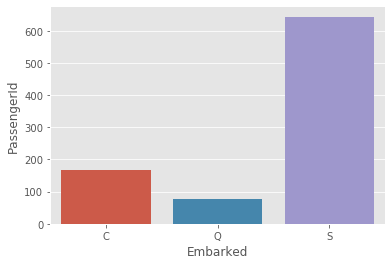

In [38]:
sns.barplot(x = "Embarked", y = "PassengerId", data= embarked_grouped)

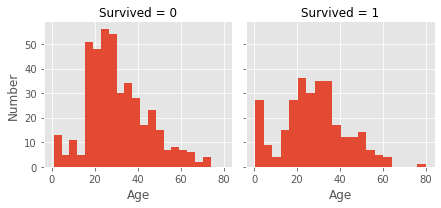

In [40]:
age_hist = sns.FacetGrid(data, col='Survived')
age_hist.map(plt.hist, 'Age', bins=20)
age_hist.set_ylabels('Number')

In [48]:
data.groupby(pd.cut(data["Age"], np.arange(0, 100, 10))).count()#.reset_index()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,,
"(0, 10]",64,64,64,64,64,64,64,64,64,64,10,64
"(10, 20]",115,115,115,115,115,115,115,115,115,115,19,115
"(20, 30]",230,230,230,230,230,230,230,230,230,230,40,230
"(30, 40]",155,155,155,155,155,155,155,155,155,155,50,154
"(40, 50]",86,86,86,86,86,86,86,86,86,86,33,86
"(50, 60]",42,42,42,42,42,42,42,42,42,42,22,42
"(60, 70]",17,17,17,17,17,17,17,17,17,17,9,16
"(70, 80]",5,5,5,5,5,5,5,5,5,5,2,5
"(80, 90]",0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
survived = data[data.Survived == 1]
died = data[data.Survived == 0]
died

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


In [59]:
survived_group = survived.groupby(pd.cut(survived["Age"], np.arange(0, 100, 10))).count().drop(columns = "Age").reset_index()
died_group = died.groupby(pd.cut(died["Age"], np.arange(0, 100, 10))).count().drop(columns = "Age").reset_index()
died_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
Age            9 non-null category
PassengerId    9 non-null int64
Survived       9 non-null int64
Pclass         9 non-null int64
Name           9 non-null int64
Sex            9 non-null int64
SibSp          9 non-null int64
Parch          9 non-null int64
Ticket         9 non-null int64
Fare           9 non-null int64
Cabin          9 non-null int64
Embarked       9 non-null int64
dtypes: category(1), int64(11)
memory usage: 1.0 KB


In [61]:
survived_group.Age

0     (0, 10]
1    (10, 20]
2    (20, 30]
3    (30, 40]
4    (40, 50]
5    (50, 60]
6    (60, 70]
7    (70, 80]
8    (80, 90]
Name: Age, dtype: category
Categories (9, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (50, 60] < (60, 70] < (70, 80] < (80, 90]]

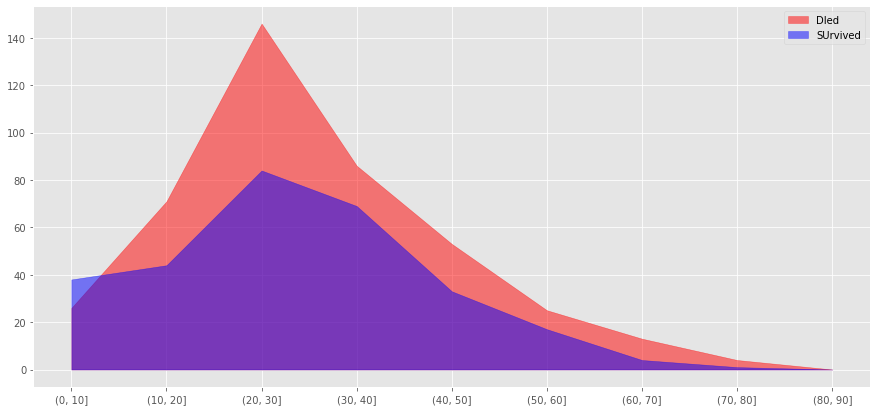

In [77]:
plt.rcParams["figure.figsize"] = (15,7)
plt.fill_between(died_group.Age.astype(str), died_group.Survived, alpha = 0.5, color = "red", label = "DIed")
plt.fill_between(survived_group.Age.astype(str), survived_group.Survived, alpha = 0.5, color = "blue", label = "SUrvived")
plt.legend()


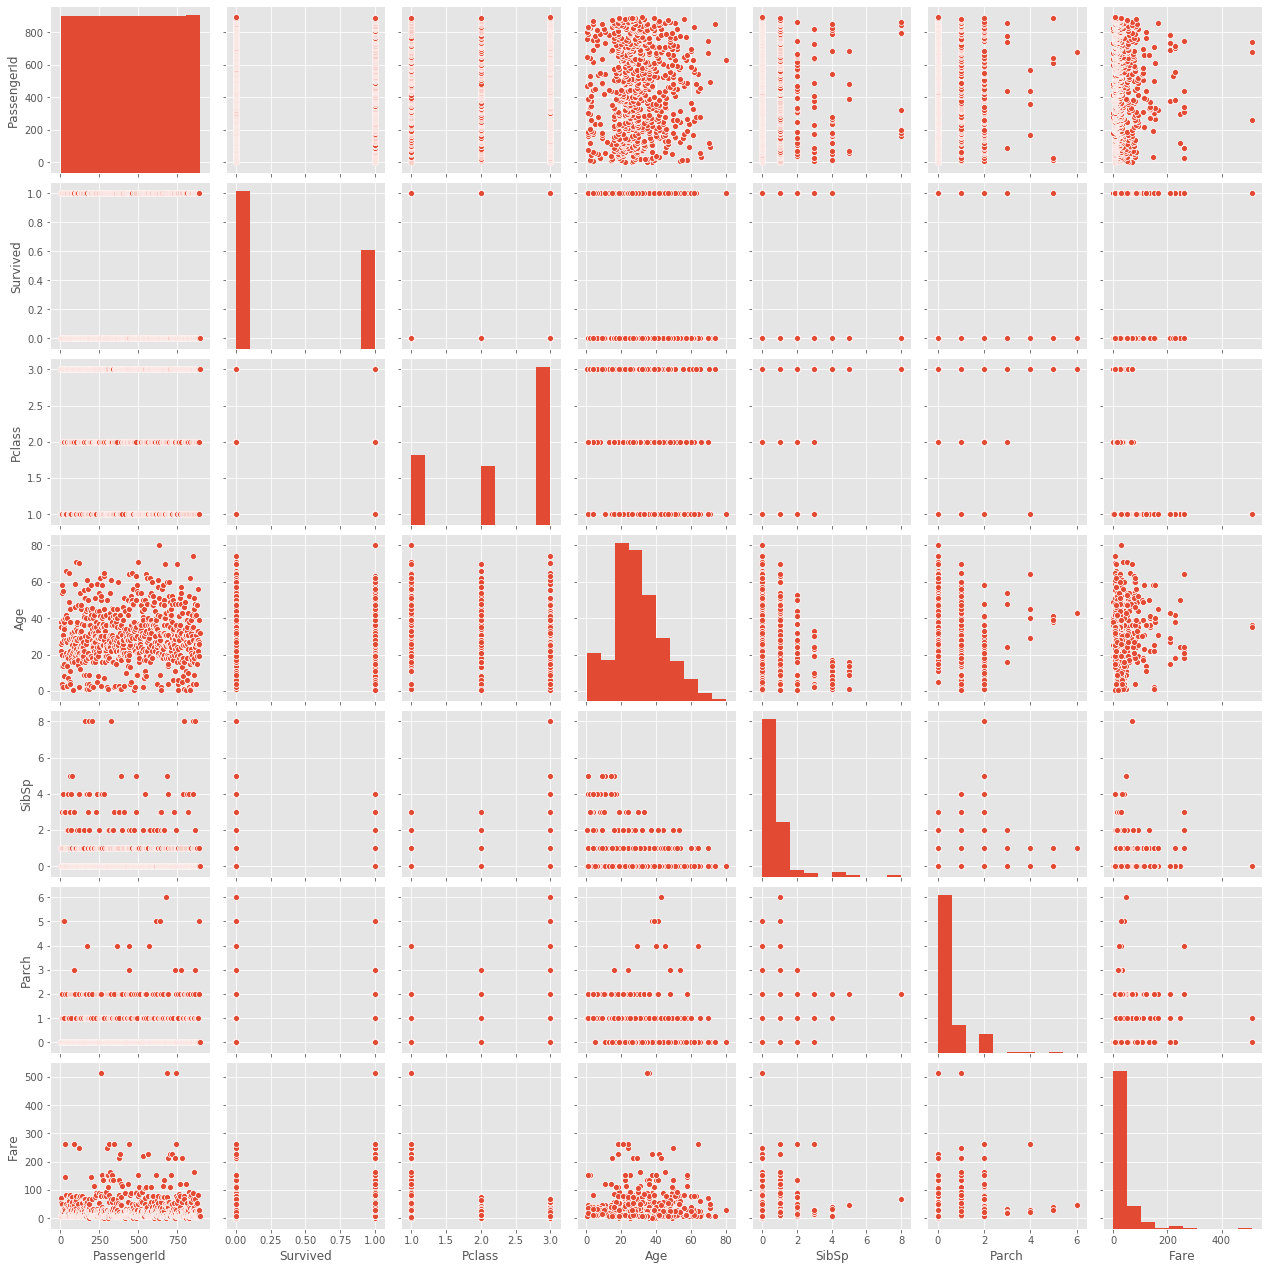

In [41]:
sns.pairplot(data)